# Homework 4 - Exploring Dataframe
### Created by Bharindra Kamanditya

Diberikan sebuah dataset “cust_seg.csv” terkait kampanye penggunaan kartu kredit di sebuah Bank. 
Berikut adalah keterangan setiap kolom dalam dataset tersebut: 

    1. custid = customer ID 
    2. sex = Jenis Kelamin {0: Laki-laki, 1: Perempuan} 
    3. AqChannel = kode Acquisition Channels 
    4. region = Kode wilayah tempat tinggal 
    5. marital status = status pernikahan {1: Single, 2: Menikah} 
    6. segment = Kode segmen/kategori pada nasabah 
    7. pre_usage = penggunaan kartu kredit sebelum campaign 
    8. Post_usage_1month = penggunaan kartu kredit 1 bulan setelah campaign 
    9. Latest_mon_usage = penggunaan kartu kredit 1 bulan terakhir 
    10. post_usage_2ndmonth = penggunaan kartu kredit 2 bulan setelah campaign 

Petunjuk Pengerjaan: 

    • Tuliskan H0 dan H1 dari masing-masing kasus di No. 2 dan No. 3. 
    • Tuliskan kesimpulan hasi uji hipotesis untuk setiap kasus di No. 2 dan No.3. 
    • Gunakan nilai alpha 0.05. 
    • Implementasikan uji hipotesis menggunakan fungsi yang ada pada library scipy. 
    • Tuliskan penjelasan/keterangan/asumsi yang Anda gunakan di Google Colab. 
    • Kumpulkan jawaban dalam bentuk Google Colab, dan pastikan aksesnya dibuat public. 
    • Dilarang melakukan tindakan plagiarisme. Tindakan plagiarisme yang terbukti mengakibatkan Homework akan dinilai 0 (nol).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df_customer = pd.read_csv('Homework 4 - Advanced Statistics.csv')

In [3]:
df_customer

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


## Tugas soal no. 1 
#### Lakukan analisis eksplorasi data pada dataset tersebut dan berikan penjelasan dan visualisasinya menggunakan python: 


### a. Jalankan fungsi-fungsi dasar: info(), describe(). 

In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [5]:
df_customer.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


### b. Buat histogram untuk melihat persebaran data beberapa variable yang menurut Anda penting. 

In [6]:
df_customer.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

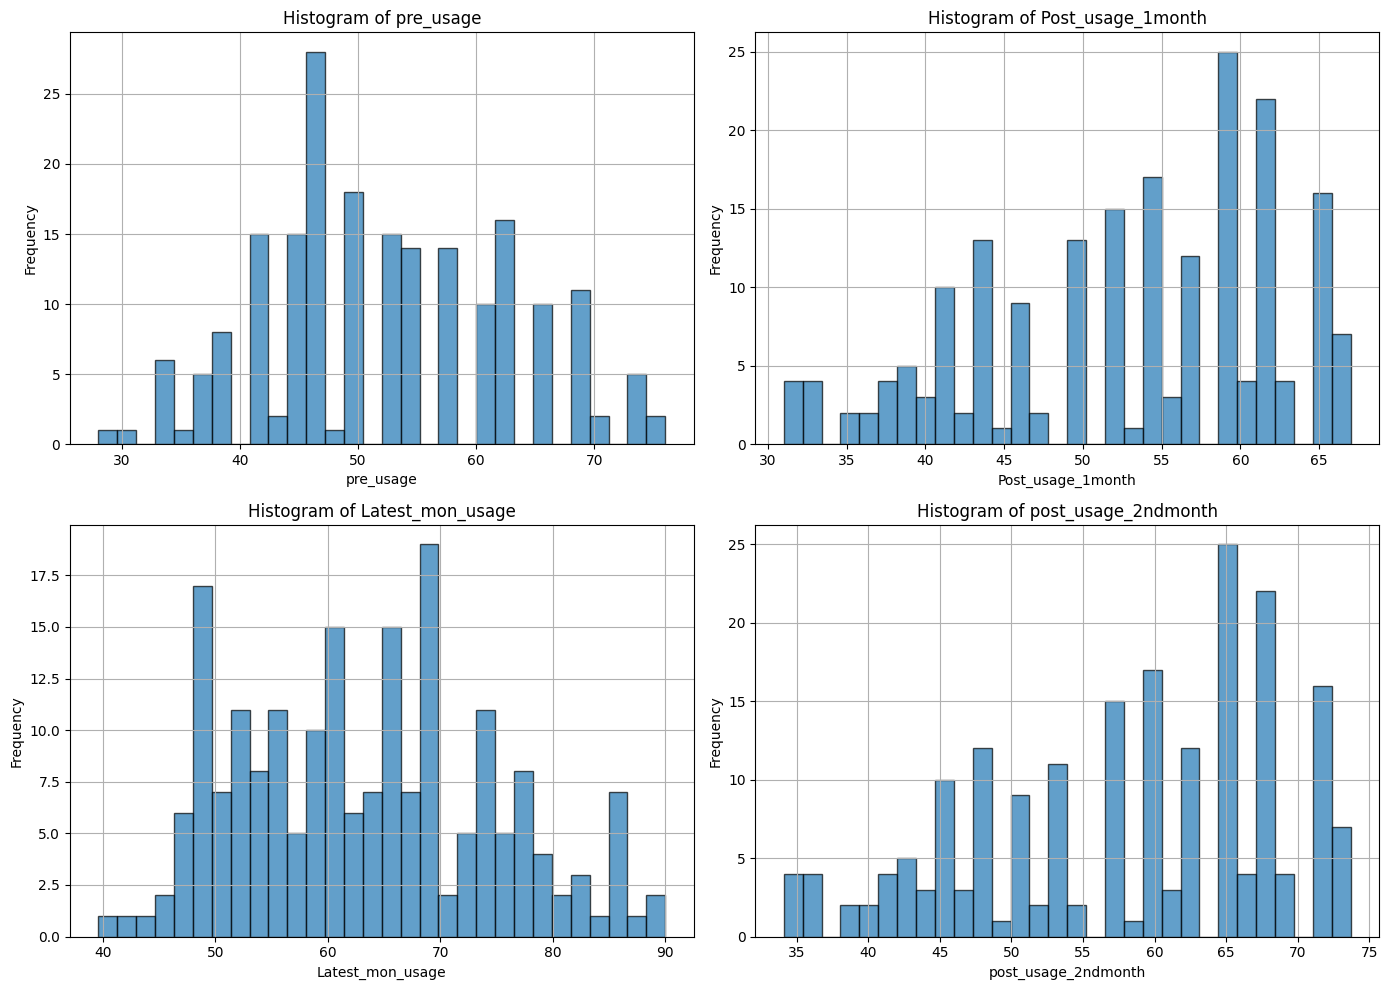

In [7]:
important_variables = ['pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, variable in enumerate(important_variables):
    ax = axs[i // 2, i % 2]
    ax.hist(df_customer[variable].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Tugas soal no. 2
#### Lakukan uji hipotesis untuk melihat apakah kampanye yang dilakukan berhasil. (Hint: gunakan fungsi ttest_rel): 

### a. Bandingkan  penggunaan  kartu  kredit  antara  sebelum  kampanye  dengan  1  bulan  setelah kampanye. 

In [8]:
# Compare credit card usage before the campaign with 1 month after the campaign
pre_usage = df_customer['pre_usage']
post_usage_1month = df_customer['Post_usage_1month']

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(pre_usage, post_usage_1month, nan_policy='omit')

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('The campaign was successful.')
else:
    print('The campaign was not successful.')

T-statistic: -0.8673065458794775
P-value: 0.3868186820914985
The campaign was not successful.



### b. Bandingkan  penggunaan  kartu  kredit  antara  sebelum  kampanye  dengan  2  bulan  setelah kampanye. 


In [9]:
# Compare credit card usage before the campaign with 2 months after the campaign
pre_usage = df_customer['pre_usage']
post_usage_2ndmonth = df_customer['post_usage_2ndmonth']

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(pre_usage, post_usage_2ndmonth, nan_policy='omit')

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('The campaign was successful.')
else:
    print('The campaign was not successful.')

T-statistic: -8.866832246938742
P-value: 4.295733828012836e-16
The campaign was successful.


## Tugas soal no. 3 
#### Lakukan  uji  hipotesis  untuk  melihat  apakah  ada  perbedaan  penggunaan  kartu  kredit  antara kelompok laki-laki dan perempuan setelah kampanye. (Hint: gunakan fungsi ttest_ind): 

### a. Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye. 

In [10]:
# Separate data for male and female customers
male_usage = df_customer[df_customer['sex'] == 0]['Post_usage_1month'].dropna()
female_usage = df_customer[df_customer['sex'] == 1]['Post_usage_1month'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_usage, female_usage, equal_var=False)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in credit card usage between male and female customers after 1 month.')
else:
    print('There is no significant difference in credit card usage between male and female customers after 1 month.')

T-statistic: -3.656408047887528
P-value: 0.000340884935942662
There is a significant difference in credit card usage between male and female customers after 1 month.


### b. Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye.

In [11]:
# Separate data for male and female customers
male_usage = df_customer[df_customer['sex'] == 0]['post_usage_2ndmonth'].dropna()
female_usage = df_customer[df_customer['sex'] == 1]['post_usage_2ndmonth'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_usage, female_usage, equal_var=False)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in credit card usage between male and female customers after 2 months.')
else:
    print('There is no significant difference in credit card usage between male and female customers after 2 months.')

T-statistic: -3.6564080478875405
P-value: 0.0003408849359426465
There is a significant difference in credit card usage between male and female customers after 2 months.
